In [2]:
library(rtracklayer)
library(dendextend)
library(gplots)
library(preprocessCore) #quantile normalize
library(matrixStats)
library(ape) #pcoa
library(lsa) #cosine distance
# ggplot dendrograms
library(ggplot2)
#library(ggdendro)

if (!dir.exists("out")){
  dir.create("out")
}

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomeInfoDb


---------------------
Welcome to dendextend version 1.15.2
Type citation('dendext

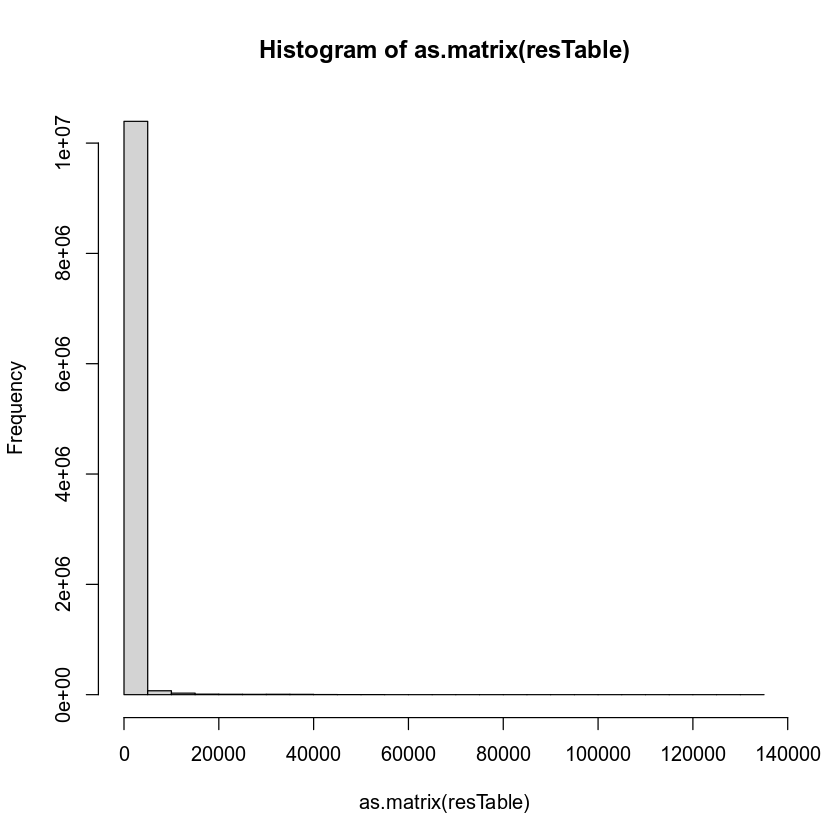

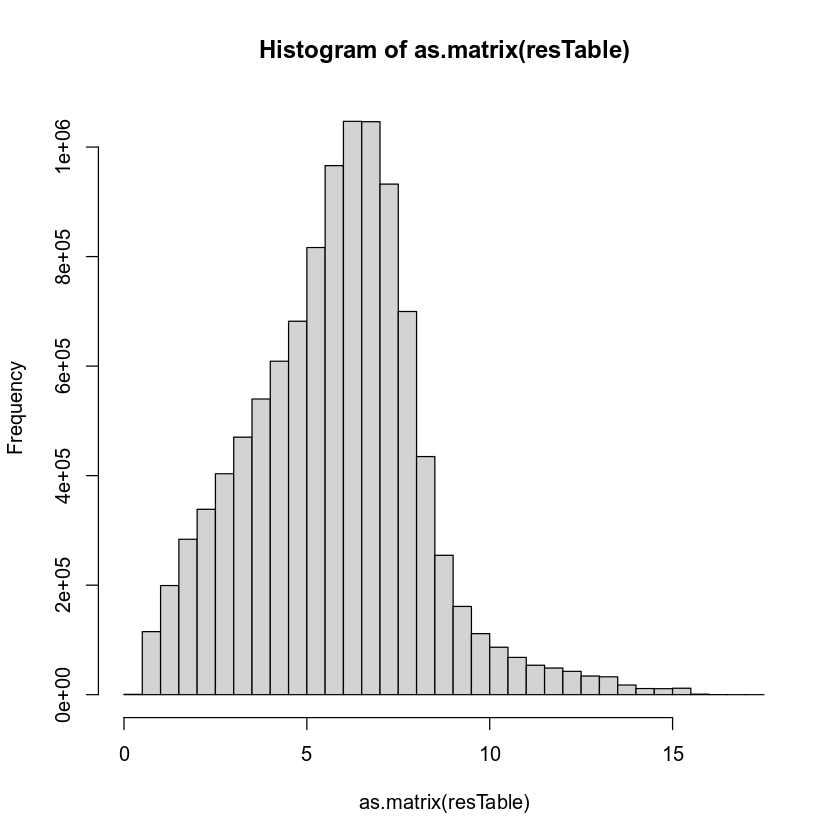

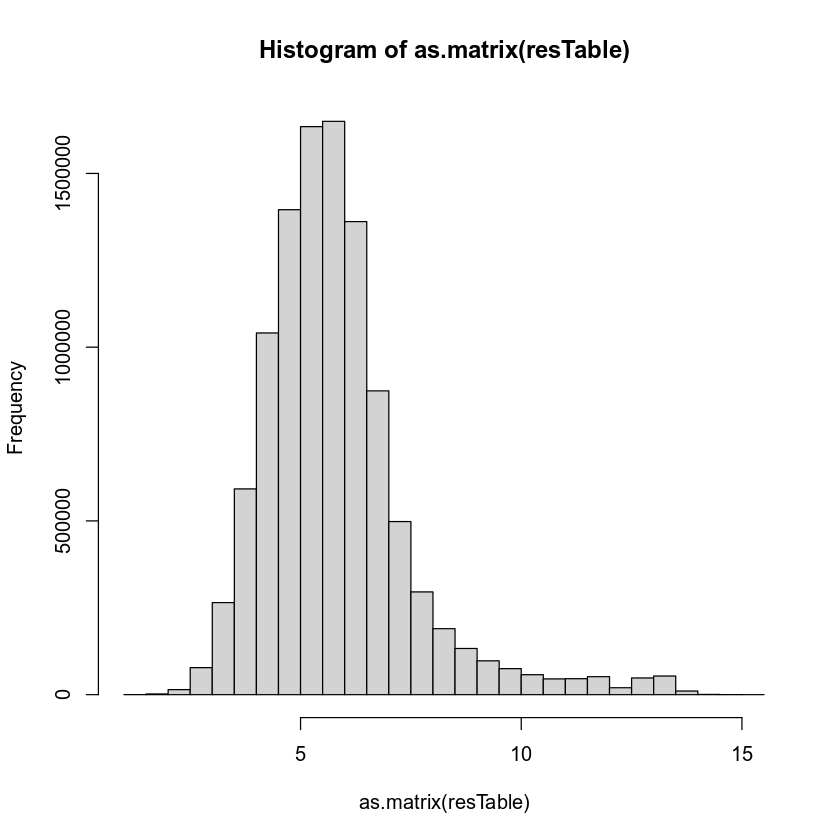

In [3]:
options(stringsAsFactors = FALSE)
selRes = "500000" # main selection
hMethod = "ward.D2" # sensitive, fits for 500K contacts


## MAIN ANALYSIS

# read table

# EPN + controls

load_data <- function(filename,subset = TRUE){
    resTable <- gzfile(filename)
    resTable <- read.table(resTable)
    #colors_to_use <- c(rep("orange",2), "orange3", rep("red",3),rep("orange",4),rep("red",2), rep("orange",3))
    
    # Subset samples
    resTable = resTable[,subset]

    # discard zeroes
    resTable[resTable==0] <- NA

    # discard NaN
    resTable <- resTable [ complete.cases(resTable), ]
    hist(as.matrix(resTable))

    # log2 to control the distribution
    resTable <- log2(resTable + 1)
    hist(as.matrix(resTable))

    # quantile normalize
    newdata <- normalize.quantiles(as.matrix(resTable))
    colnames(newdata) <- colnames(resTable)
    rownames(newdata) <- rownames(resTable)
    resTable <- newdata
    hist(as.matrix(resTable))
    return(resTable)
}
sampleselect=vector(mode = "logical", length = 24)
sampleselect[] = TRUE
sampleselect[14] = FALSE

filename <- "data/contacts_gcMapExplorer.bin_size_500000.nz_0.00.IC.txt.gz"
resTable <- load_data(filename,sampleselect)

In [4]:
colnames(resTable)

[1] "X9EP1"              "X9EP9"              "X7EP18"            
 [4] "X7EP41"             "X11EP22"            "X4EP53"            
 [7] "X16EP7"             "X4EP5"              "X15EP2"            
[10] "BT214"              "PFA_EPD210FH"       "RELPOS_BT"         
[13] "RELPOS_EP"          "FFPE"               "CHLA4488.5_primary"
[16] "CHLA4488.5_relapse" "case32_primary"     "case32_relapse"    
[19] "AstroCb_rep1"       "AstroCb_rep2"       "Astro_inter"       
[22] "NPC_inter"          "Neu_inter"

# Metaparameterizations

## Vary distance metric
Relapses clear outliers regardless of distance metric used.

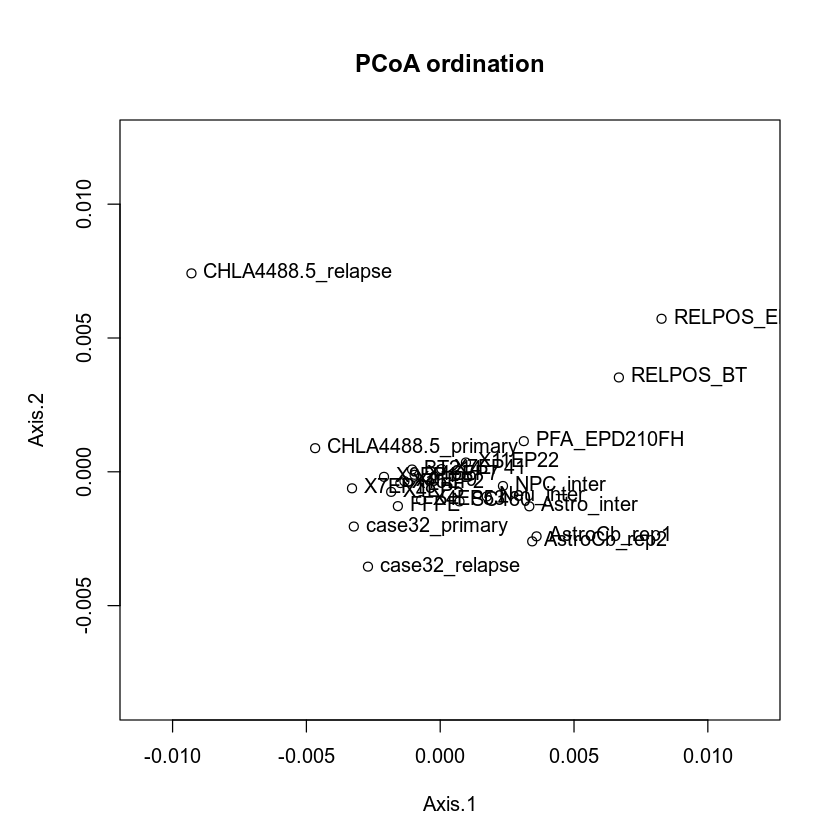

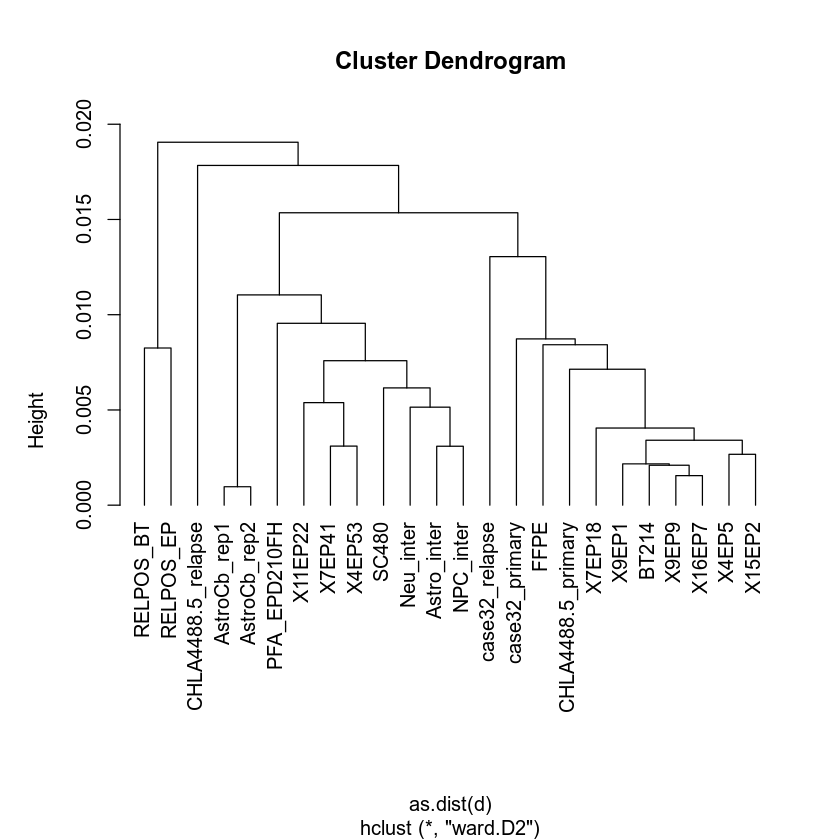

In [6]:
inData <- as.matrix(resTable[])
d = 1-lsa::cosine(inData)
result = pcoa(d)
biplot(result)

hc <- hclust(as.dist(d),method=hMethod)
plot(hc,hang=-1)

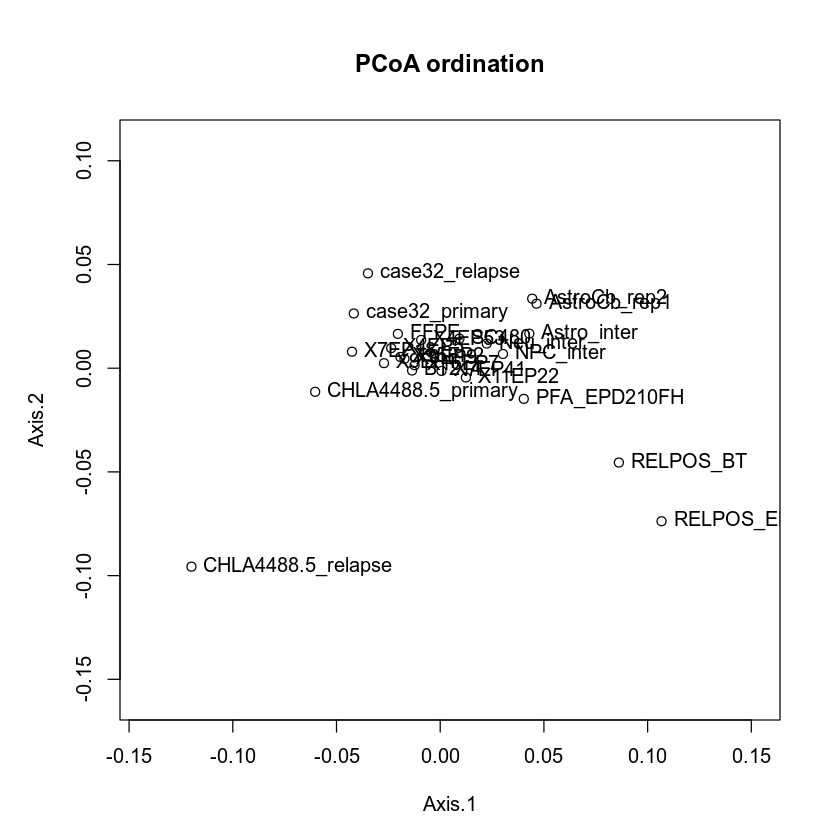

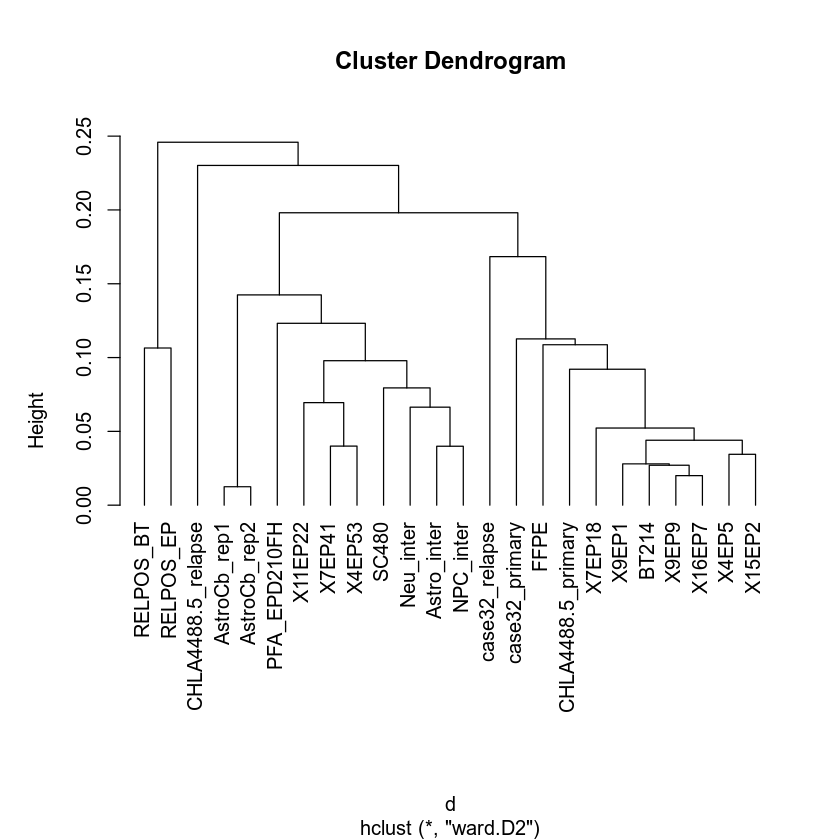

In [7]:
inData <- as.matrix(resTable[])
#d = dist(t(inData),method='euclidean')
d = as.dist(1-cor((inData),method='pearson'))
result = pcoa(d)
biplot(result)

hc <- hclust(d,method=hMethod)
plot(hc,hang=-1)

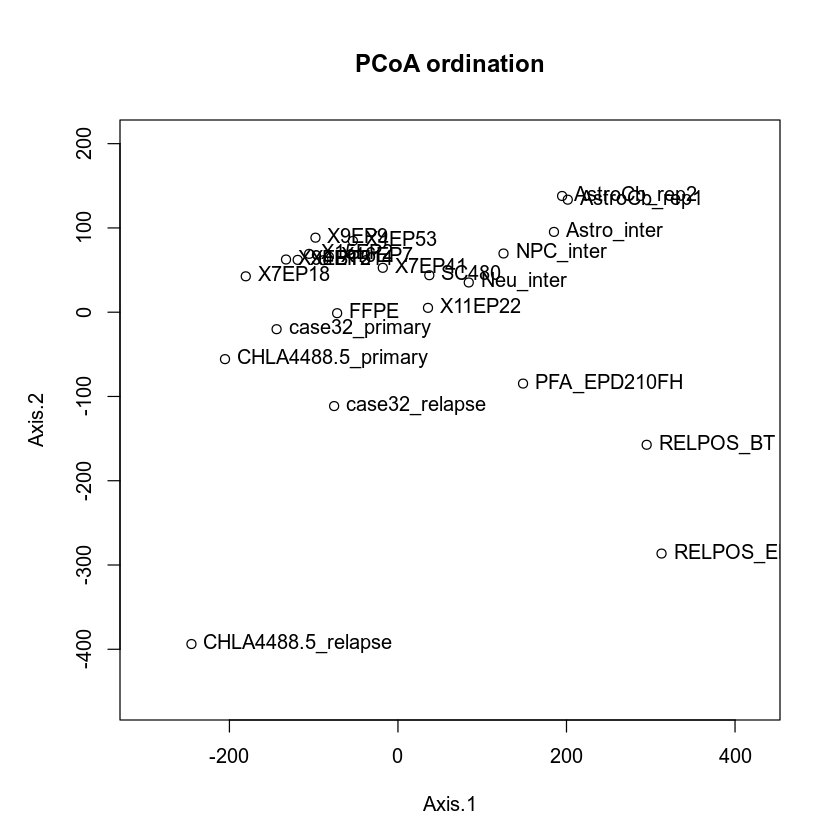

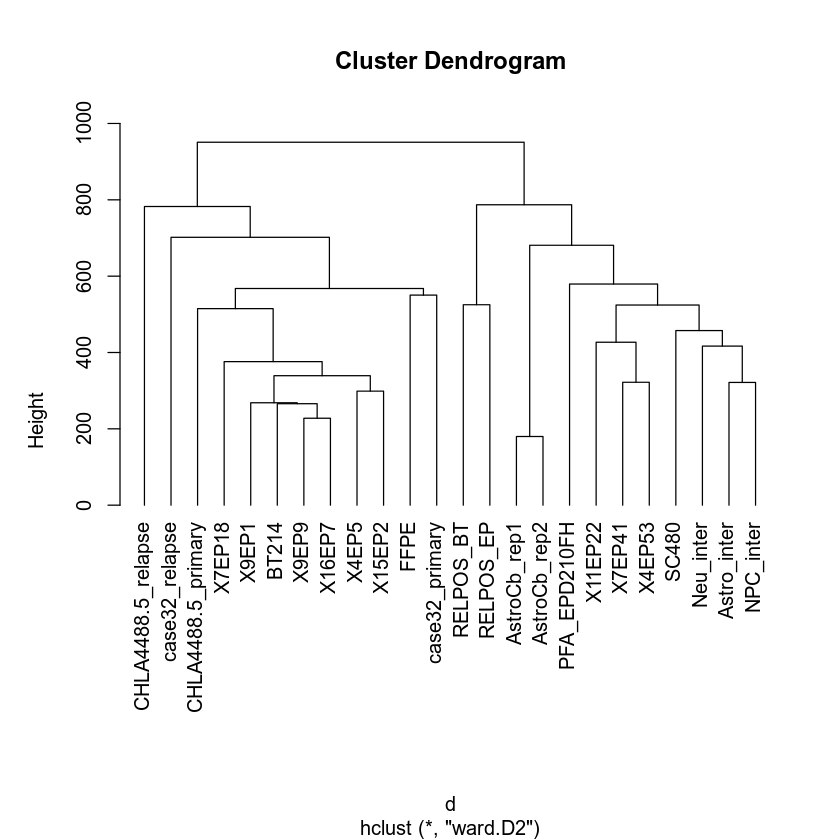

In [8]:
inData <- as.matrix(resTable[])
d = dist(t(inData),method='euclidean')
#d = as.dist(1-cor((inData),method='pearson'))
result = pcoa(d)
biplot(result)

hc <- hclust(d,method=hMethod)
plot(hc,hang=-1)

## Select highly variable features
20000 features separates samples roughly as cell line, relapses, PFA, RELA. Misclassifications are FFPE and SC480.

In [10]:
# select most variable features
featureselect=vector(mode = "logical", length = length(colnames(resTable)))
featureselect[]=TRUE

rv <- rowVars(resTable[,featureselect])
rm <- rowMeans(resTable)
rvIdxSorted <- order(-rv)

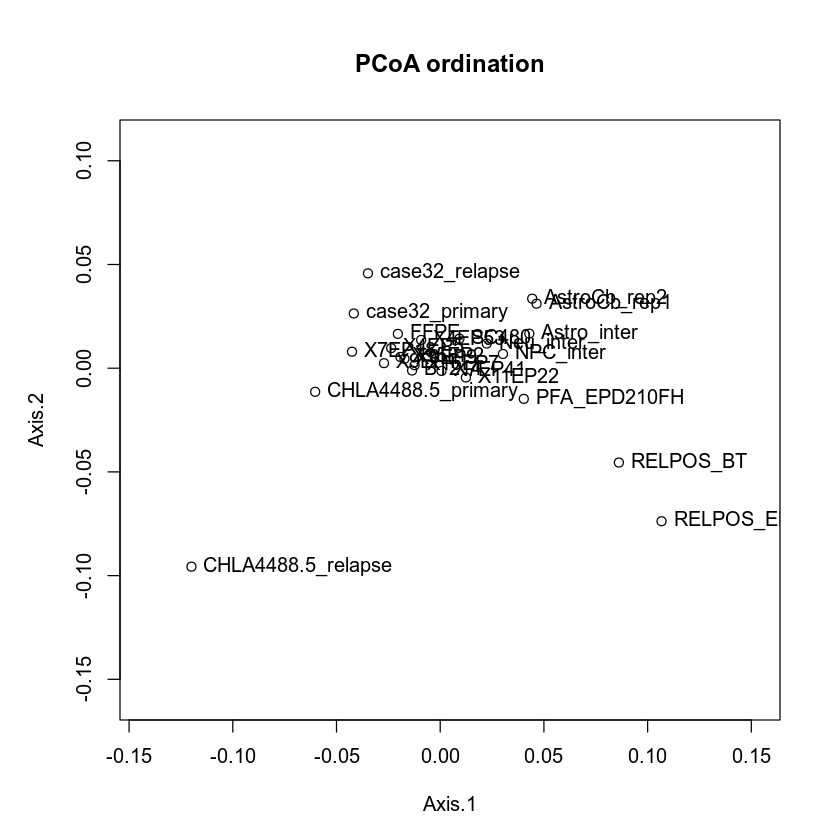

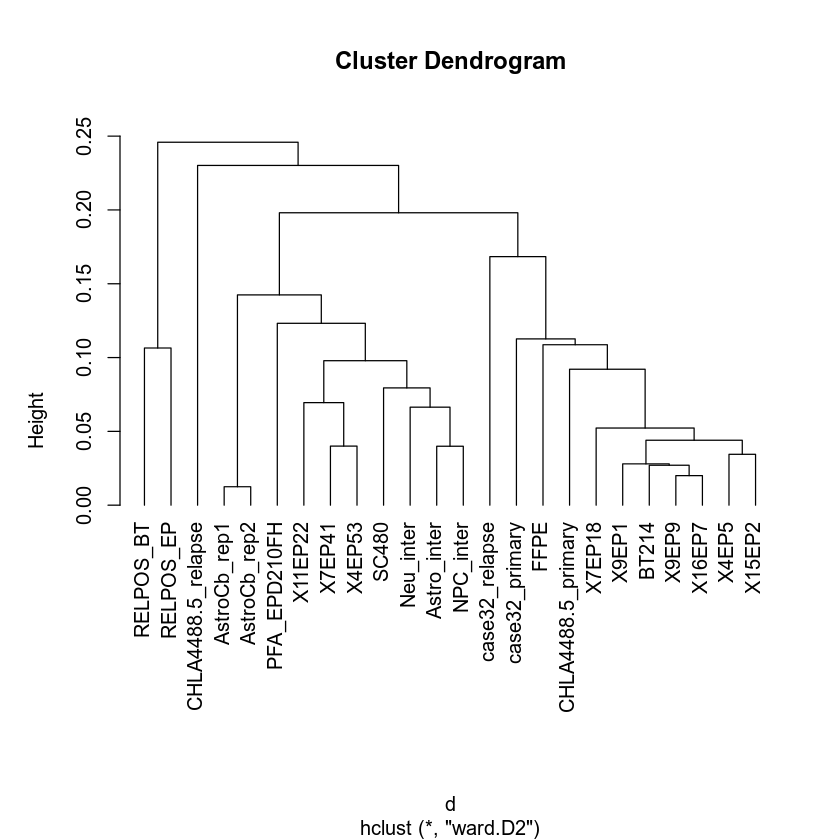

In [11]:
inData <- as.matrix(resTable[])
#d = dist(t(inData),method='euclidean')
d = as.dist(1-cor((inData),method='pearson'))
result = pcoa(d)
biplot(result)

hc <- hclust(d,method=hMethod)
plot(hc,hang=-1)

[1] 20000


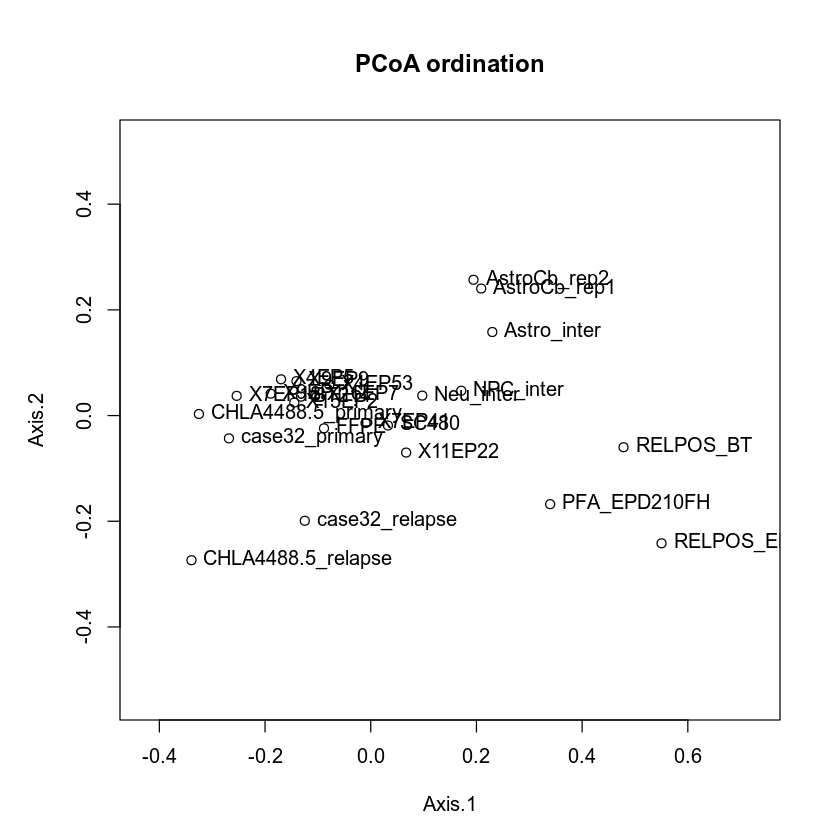

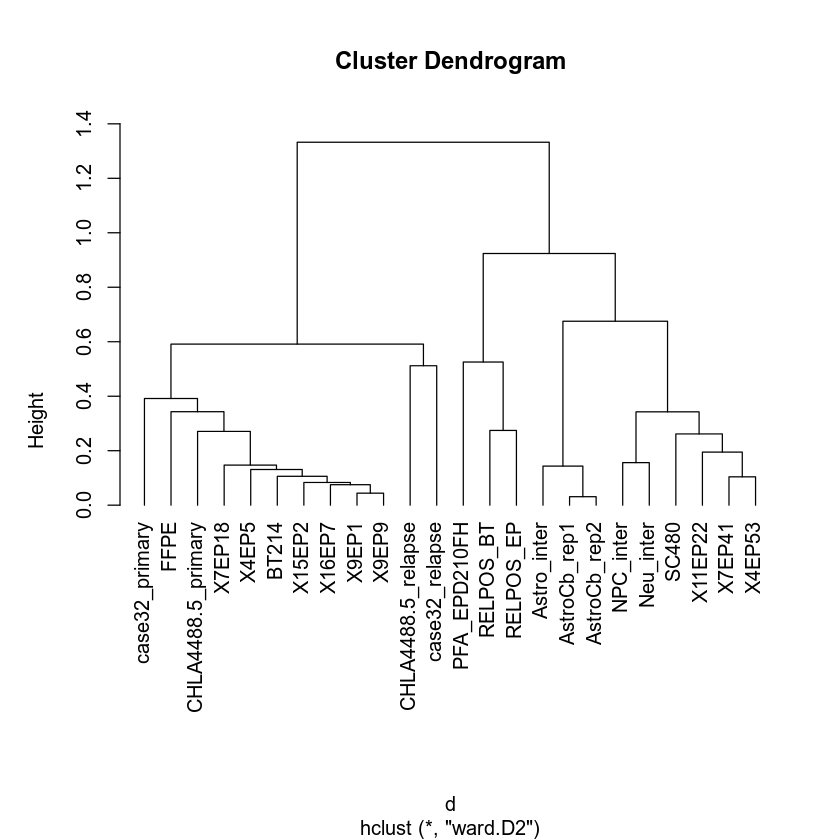

In [12]:
lim = 20000
idx <- rvIdxSorted[1:lim]
print(lim)
inData <- as.matrix(resTable[idx,])
#d = dist(t(inData),method='euclidean')
d = as.dist(1-cor((inData),method='pearson'))
result = pcoa(d)
biplot(result)

hc <- hclust(d,method=hMethod)
plot(hc,hang=-1)

[1] 5000


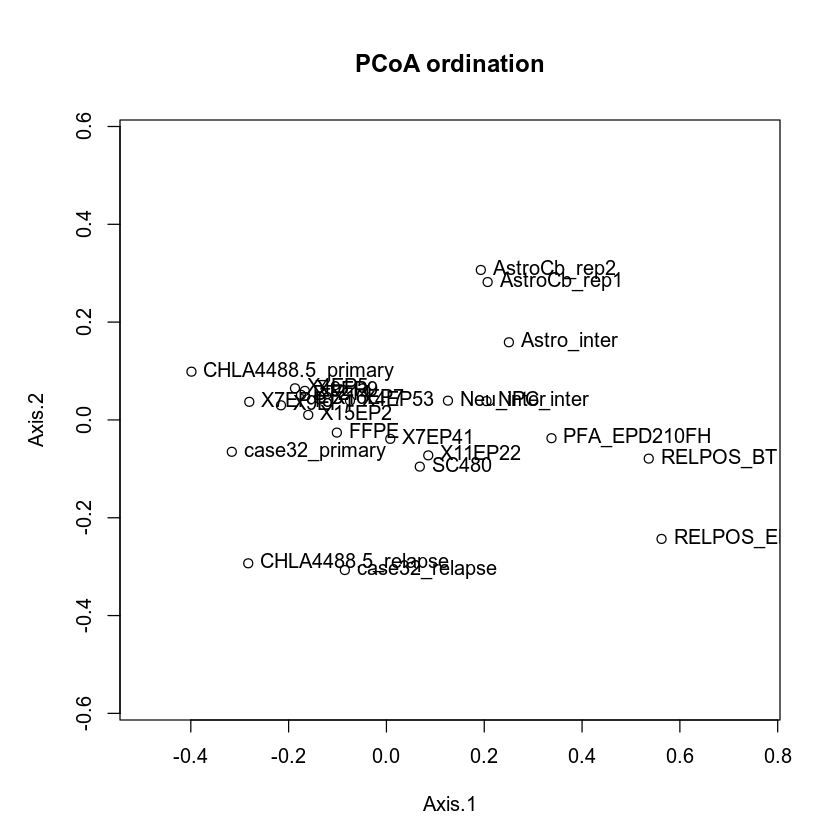

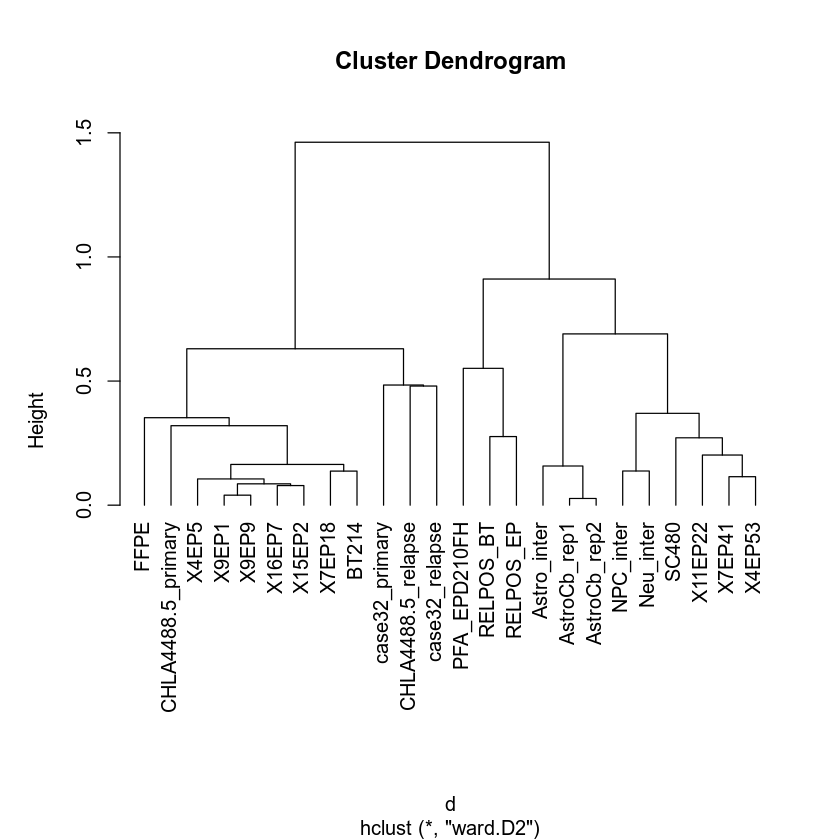

In [13]:
lim = 5000
idx <- rvIdxSorted[1:lim]
print(lim)
inData <- as.matrix(resTable[idx,])
#d = dist(t(inData),method='euclidean')
d = as.dist(1-cor((inData),method='pearson'))
result = pcoa(d)
biplot(result)

hc <- hclust(d,method=hMethod)
plot(hc,hang=-1)

## Vary bin resolution
Relapses are even more outlier in the 100k resolution data.

In [ ]:
filename <- "data/contacts_gcMapExplorer.bin_size_100000.nz_0.00.IC.txt.gz"
resTable_100k <- load_data(filename,sampleselect)

In [ ]:
inData <- as.matrix(resTable_100k[])
#d = dist(t(inData),method='euclidean')
d = as.dist(1-cor((inData),method='pearson'))
result = pcoa(d)
biplot(result)

hc <- hclust(d,method=hMethod)
plot(hc,hang=-1)
print(dim(resTable_100k))

In [ ]:
rv <- rowVars(resTable_100k)
rvIdxSorted <- order(-rv)

lim = 20000
idx <- rvIdxSorted[1:lim]
print(lim)
inData <- as.matrix(resTable_100k[idx,])
#d = dist(t(inData),method='euclidean')
d = as.dist(1-cor((inData),method='pearson'))
result = pcoa(d)
biplot(result)

hc <- hclust(d,method=hMethod)
plot(hc,hang=-1)

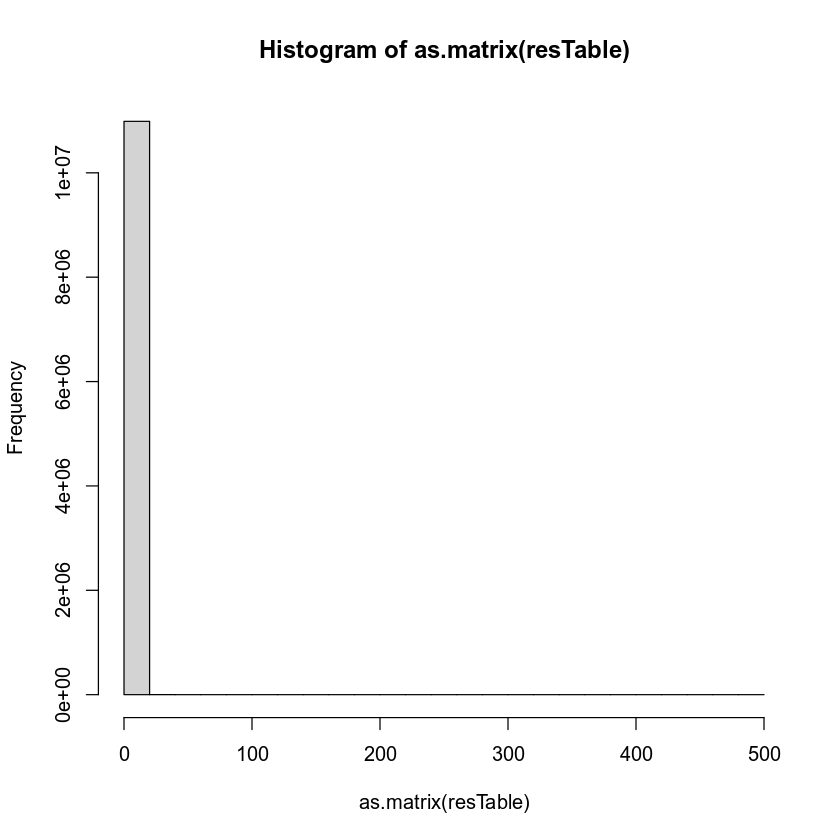

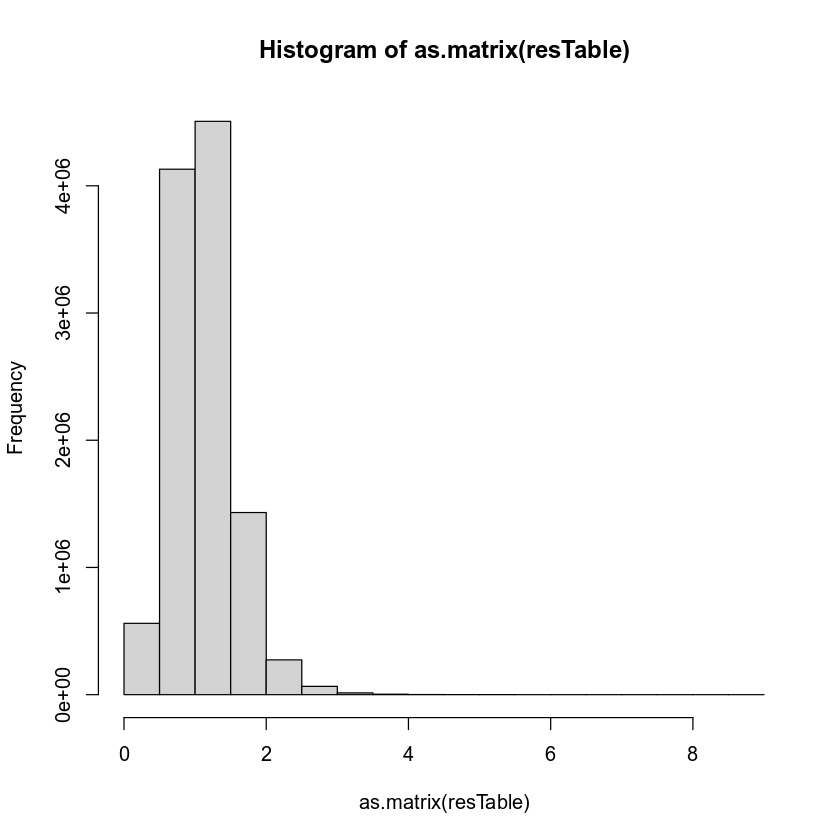

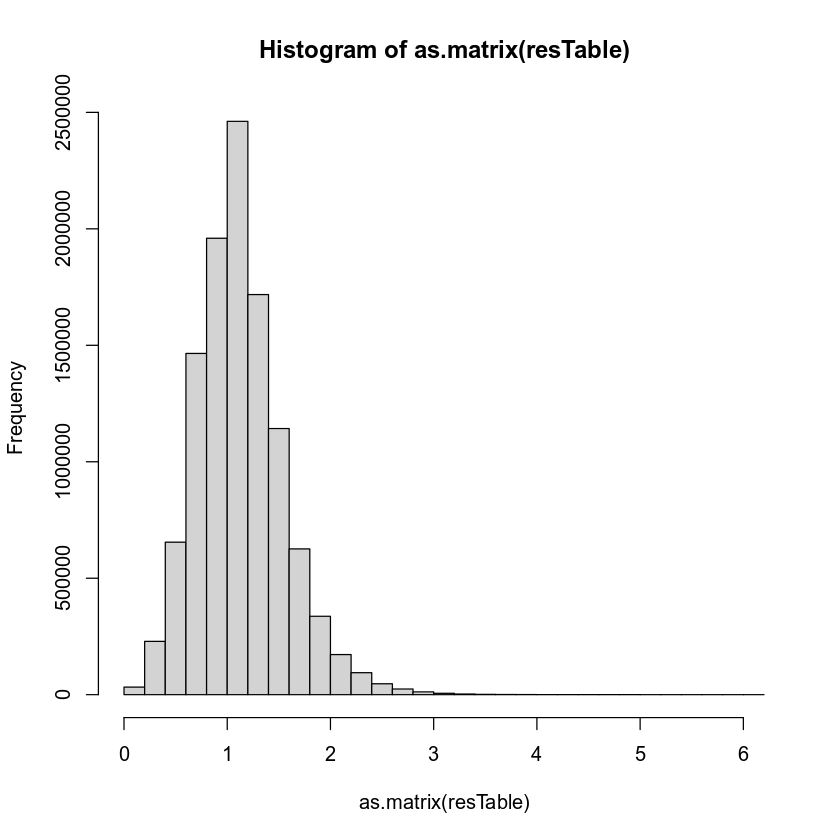

In [4]:
filename <- "data/contacts_gcMapExplorer.bin_size_500000.nz_0.00.MCFS.txt.gz"
resTable_mcfs <- load_data(filename)

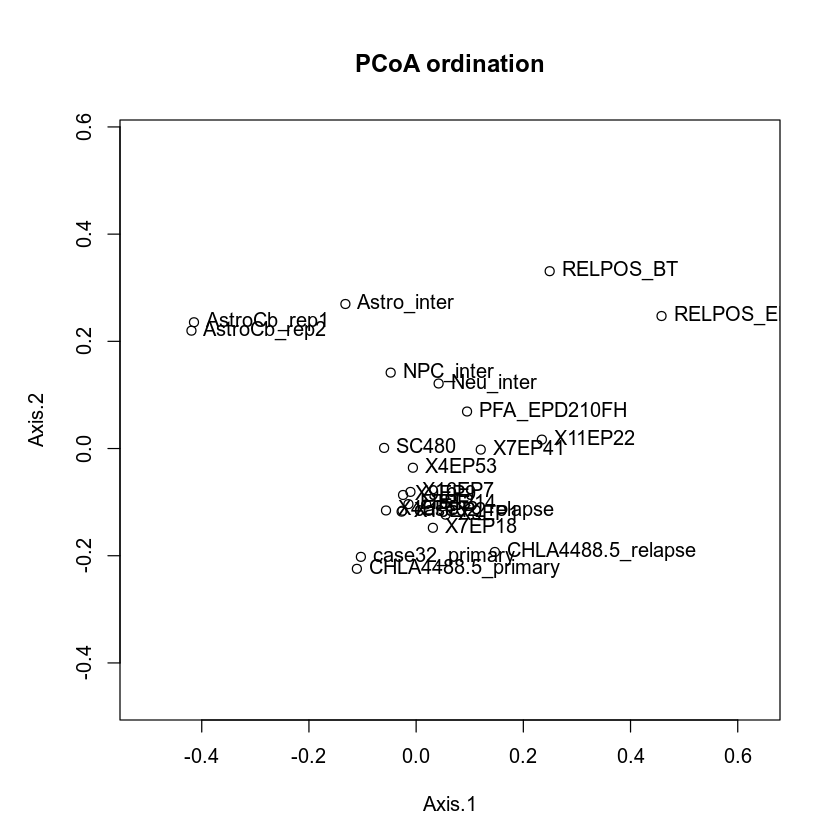

[1] 457799     24


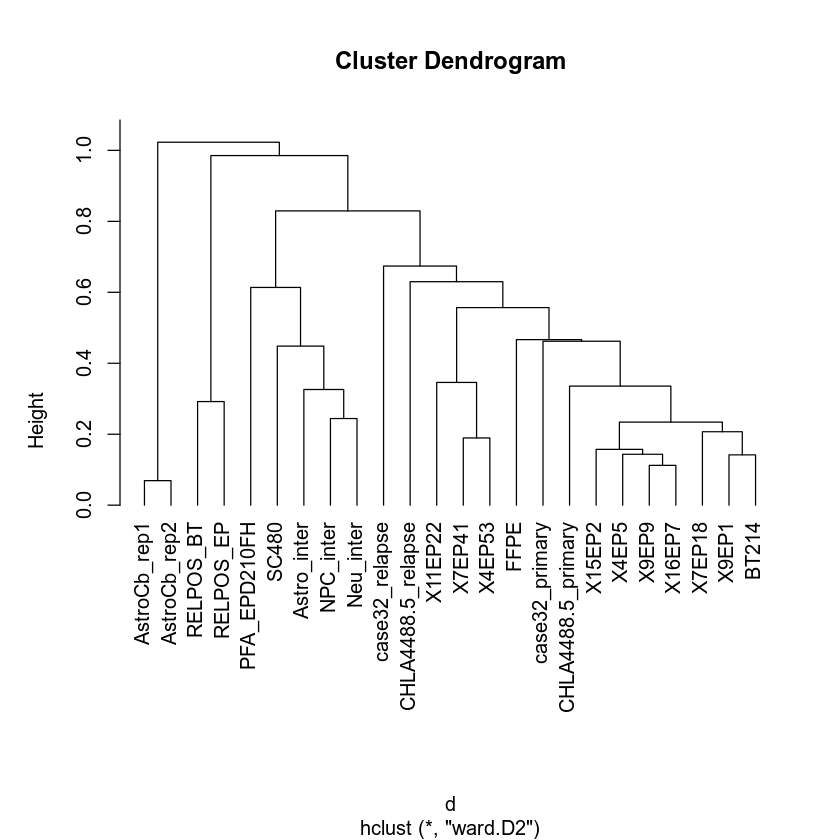

In [5]:
inData <- as.matrix(resTable_mcfs[])
#d = dist(t(inData),method='euclidean')
d = as.dist(1-cor((inData),method='pearson'))
result = pcoa(d)
biplot(result)

hc <- hclust(d,method=hMethod)
plot(hc,hang=-1)
print(dim(resTable_mcfs))

[1] 20000


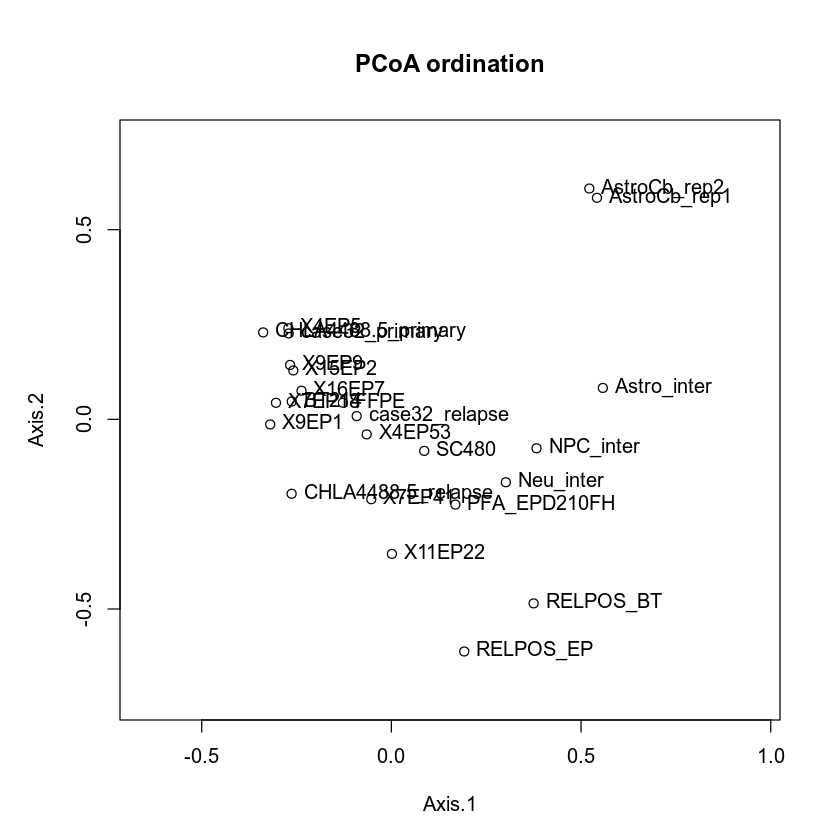

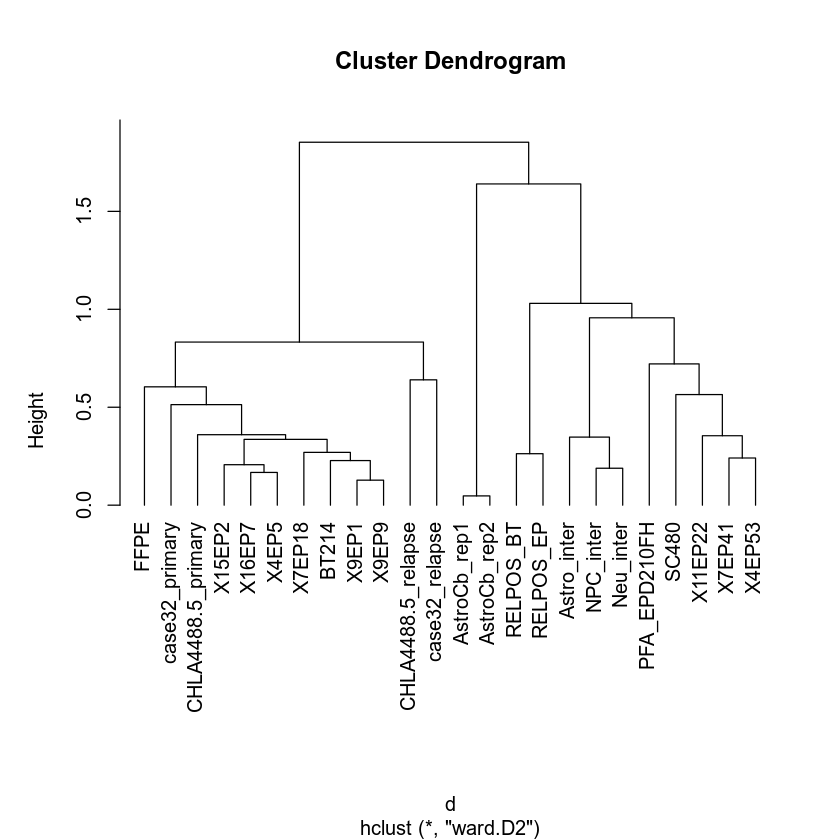

In [6]:
rv <- rowVars(resTable_mcfs)
rvIdxSorted <- order(-rv)

lim = 20000
idx <- rvIdxSorted[1:lim]
print(lim)
inData <- as.matrix(resTable_mcfs[idx,])
#d = dist(t(inData),method='euclidean')
d = as.dist(1-cor((inData),method='pearson'))
result = pcoa(d)
biplot(result)

hc <- hclust(d,method=hMethod)
plot(hc,hang=-1)

# Final figure, formatting, etc.

[1] 20000


png 
  2

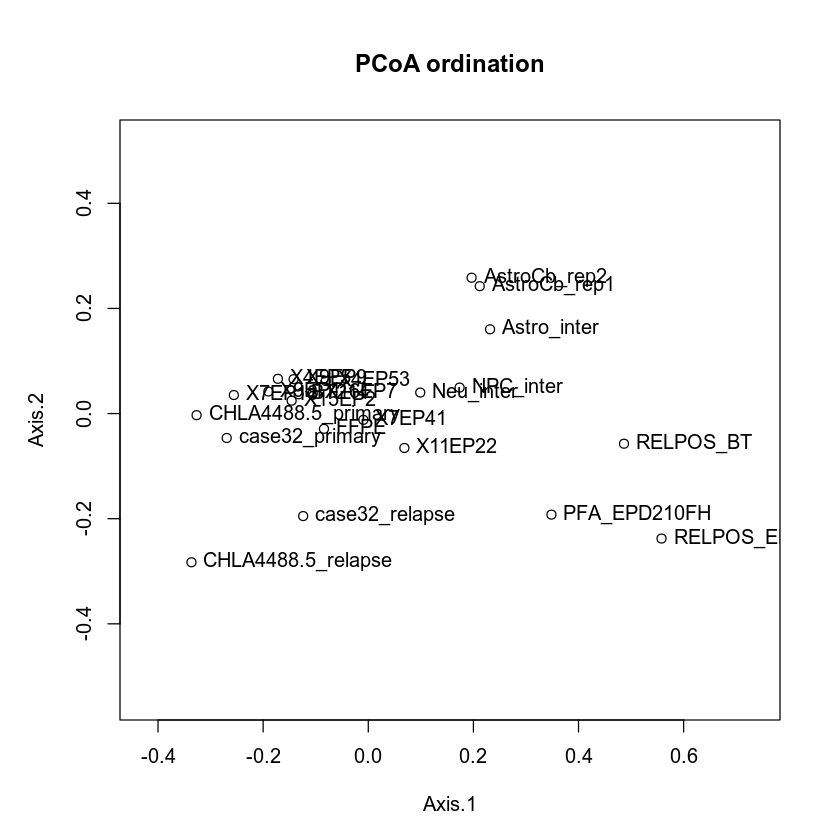

In [8]:
# select most variable features
rv <- rowVars(resTable)
rm <- rowMeans(resTable)
rvIdxSorted <- order(-rv)

lim = 20000
idx <- rvIdxSorted[1:lim]
print(lim)
inData <- as.matrix(resTable[idx,])
#d = dist(t(inData),method='euclidean')
d = as.dist(1-cor((inData),method='pearson'))
result = pcoa(d)
pcoa_plot <- biplot(result)

histFile = paste0("out/hist_all.pdf")
pdf(histFile, width = 9, height = 9)
hc <- hclust(d,method=hMethod)
hcd <- as.dendrogram(hc)
cell_colors <- c(rep("orange",13), rep("red",2), rep("blue",3), "purple", "magenta", rep("red", 3))
origin_colors <- c("lightgray", "gray",rep("lightgray",8),rep("gray",2),rep("darkgray",3),"slategray",rep("black",2),rep("slategray",2),rep("lightgray",3))
par(mai=c(4,1,.1,.1),ps=21)
plot(hcd)
colored_bars(colors = cbind(origin_colors,cell_colors), dend = hcd,sort_by_labels_order = FALSE)
dev.off()

In [15]:
length(rv)

[1] 457851